In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #RF work by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees
from sklearn.metrics import precision_score #When we said that the market would go up, did it actually go up

In [2]:
%matplotlib inline

In [3]:
sp500 = yf.Ticker('^GSPC') #Query Ticker SP500

In [4]:
sp500 = sp500.history(period='max') #Query historical data

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0,0
2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0,0
2022-12-07 00:00:00-05:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0,0


<AxesSubplot:xlabel='Date'>

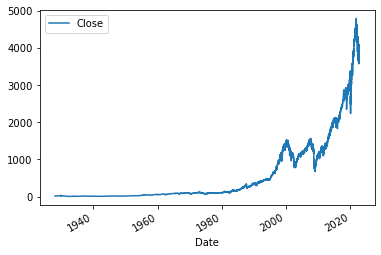

In [6]:
sp500.plot.line(y='Close', use_index=True) #use_index is x-axis

In [7]:
del sp500['Dividends']
del sp500['Stock Splits']

In [8]:
#Setting up our target for ML (this target is going to be will the price go up or down tomorrow)
sp500['Tomorrow'] = sp500['Close'].shift(-1) #Show the close price tomorrow

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,3941.260010
2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,3933.919922
2022-12-07 00:00:00-05:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,3963.510010


In [10]:
#Set up a target (what we're going to try to predict with ML)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int) # 1 for True and 0 rof False

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,3941.260010,0
2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,3933.919922,0
2022-12-07 00:00:00-05:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,3963.510010,1


In [12]:
# Clear old data from df, because it is useless
sp500 = sp500.loc['1990-01-01':].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,3941.260010,0
2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,3933.919922,0
2022-12-07 00:00:00-05:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,3963.510010,1


In [14]:
#Training an initial ML Model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) #We're going to pass in a few parameters

#We split our data up into a train and test set
train = sp500.iloc[:-100] 
test = sp500[-100:]

# Train our prediction model
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target']) #train predictors and try to predict the target

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
#Measure how accurate the model
preds = model.predict(test[predictors]) #We're going to generate predictions using our model and we'll pass in our test set with the predictors

In [16]:
preds = pd.Series(preds, index=test.index)
preds #Check our predictions in the Series

Date
2022-07-21 00:00:00-04:00    0
2022-07-22 00:00:00-04:00    0
2022-07-25 00:00:00-04:00    0
2022-07-26 00:00:00-04:00    0
2022-07-27 00:00:00-04:00    0
                            ..
2022-12-05 00:00:00-05:00    0
2022-12-06 00:00:00-05:00    0
2022-12-07 00:00:00-05:00    0
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
Length: 100, dtype: int32

In [17]:
#Calculate the precision score
precision_score(test['Target'], preds)

0.4153846153846154

<AxesSubplot:xlabel='Date'>

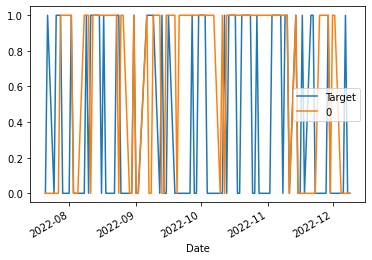

In [18]:
#We just quickly plot our predictions and in order to do that we will combine our actual values with uor pred values
combine = pd.concat([test['Target'], preds], axis=1)
combine.plot() # 0 is our pred and Target is what actually happened 

In [19]:
#Building a backtesting system
def predict(train, test, predictors, model): #Create a prediction function
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250): #Create a backtest function
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions) #append all predictions
    return pd.concat(all_predictions) #At the end we're going to concatenate all our predictions together (it can take a list of df and combine then all into a single df)

In [21]:
predictions = backtest(sp500, model, predictors)

In [23]:
#After we finish the backtest we can actually start evaluating the error of our predictions
predictions['Predictions'].value_counts() #Take a look at predictions and see how many days we predicted the market would go up vs down (0 - go down, 1 - go up)

0    3378
1    2423
Name: Predictions, dtype: int64

In [24]:
precision_score(predictions['Target'], predictions['Predictions']) #We've gotten our PS

0.529508873297565

In [25]:
predictions['Target'].value_counts() / predictions.shape[0] #Check our PS (this algorithm performend a little bit worse than just natural percentage of days that the stock market went up)

1    0.534218
0    0.465782
Name: Target, dtype: float64

In [30]:
#Adding additional predictors to our model
horizons = [2, 5, 60, 250, 1000] #Create a vatiety of rolling averages (we calculate the mean close price in te last 2, 5... days)
  
#We find the ratio between today's closing price and the closing price in those periods which will help us know tah market go up or down
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f'Close_Ratio_{horizon}'
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close'] #Ratio between today's close and the average close in the last 2, 5... days
    
    trend_column = f'Trend_{horizon}' #We can look at a trend
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target'] #It is going to on any given day (it is going to look at the past few days and see the average the sum of the target)
    
    new_predictors += [ratio_column, trend_column] #We gonna add these new to new predictors

In [32]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02 00:00:00-05:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,3998.840088,0,0.999402,0.0,1.010350,1.0,1.063393,24.0,0.979395,110.0,1.128747,543.0
2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,3941.260010,0,0.990972,0.0,0.990555,1.0,1.044676,23.0,0.962507,109.0,1.108119,543.0
2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,3933.919922,0,0.992748,0.0,0.977084,1.0,1.030392,22.0,0.949342,108.0,1.091741,543.0


In [35]:
#Improving our model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [38]:
#Building a backtesting system
def predict(train, test, predictors, model): #Create a prediction function
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1] #Proba method, which returns is actually a probability that the row will be 0 or 1
    preds[preds >= .6] = 1 #Set our custom threshold
    preds[preds < .6] = 0 #These 2 rows are reduce our total number of trading days but it will increase the chance that the price will actually go up on those days
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions['Predictions'].value_counts()

0.0    3987
1.0     813
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5694956949569495